In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from keras import layers,losses
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np

In [2]:
data_dir = "GaitDatasetA-silh/"
classes = os.listdir(data_dir)
class_names = [re.sub(r'\([^)]*\)', '', c).strip().lower().replace(" ", "_") for c in classes]

In [3]:
print(class_names)

['fyc', 'hy', 'ljg', 'lqf', 'lsl', 'ml', 'nhz', 'rj', 'syj', 'wl', 'wq', 'wyc', 'xch', 'xxj', 'yjf', 'zc', 'zdx', 'zjg', 'zl', 'zyf']


In [4]:
X = []
y = []

for clazz in classes:
    # loop all folders in each class
    for folder in os.listdir(data_dir + clazz):
        # loop all images in each folder
        for file in os.listdir(data_dir + clazz + "/" + folder):
            # add the file path to the list
            X.append(data_dir + clazz + "/" + folder + "/" + file)
            # add the class name to the list
            y.append(clazz)

# create a dataframe containing all the file paths and their corresponding class names
df = pd.DataFrame()
df["filepath"] = X
df["class"] = y

In [5]:
df.to_csv("data-2.csv", index=False)

In [6]:
# print first file path
print(df["filepath"][0])

GaitDatasetA-silh/fyc/00_1/fyc-00_1-001.png


In [7]:
# df = pd.DataFrame({"X": X, "y": y})
# df.to_csv("data.csv", index=False)

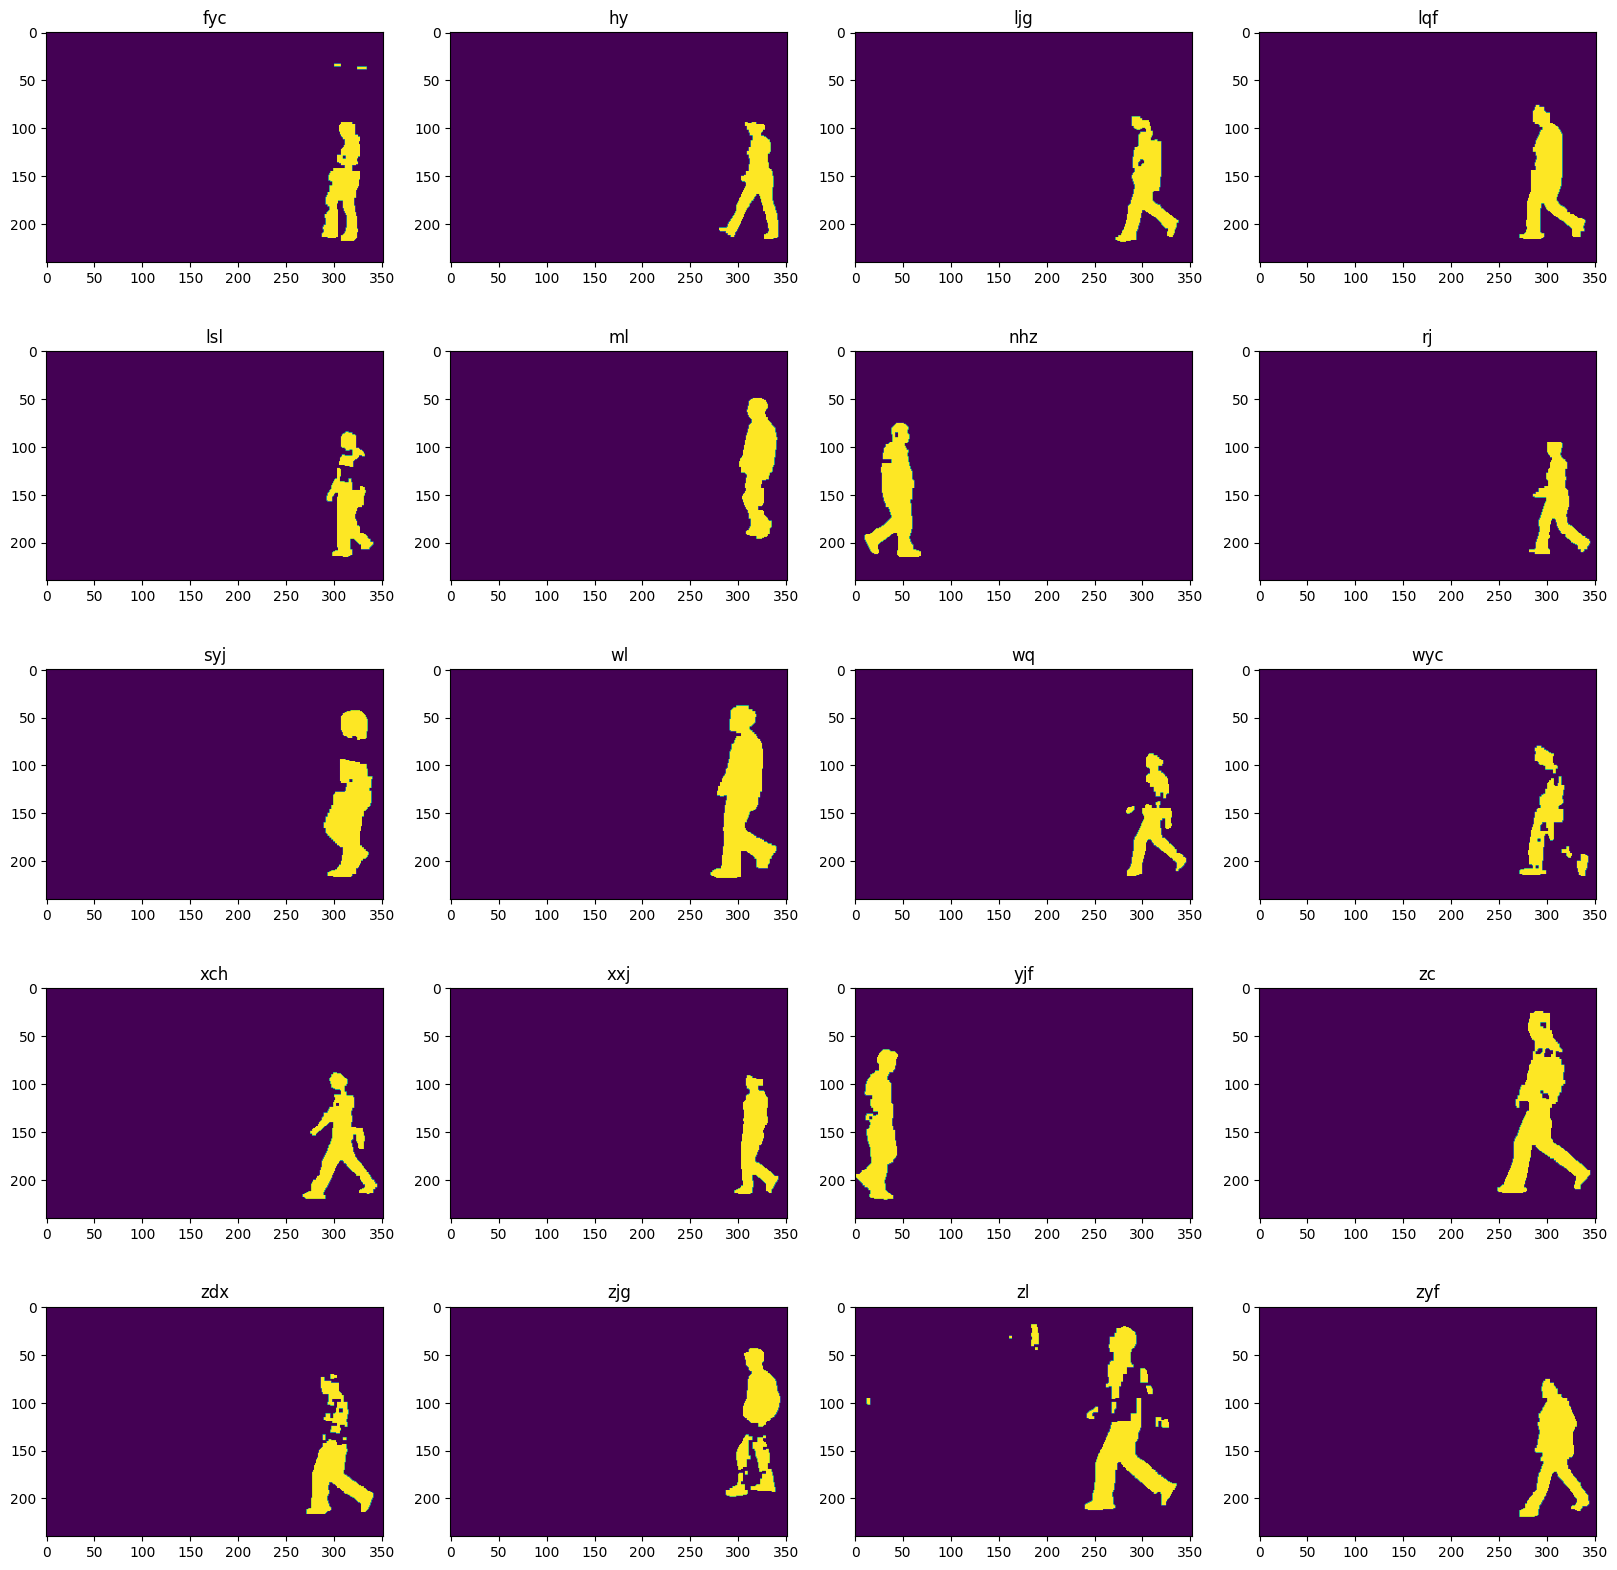

In [8]:
# Display the first photo of each class max 4 in a row
fig, axes = plt.subplots(len(classes) // 4, 4, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    ax.imshow(Image.open(df[df["class"] == classes[i]]["filepath"].values[0]))
    ax.set_title(classes[i])
    ax.axis("on")

plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df['filepath'], df['class'], test_size=0.2, random_state=42)

In [10]:
print(X_train)

8129     GaitDatasetA-silh/syj/00_1/syj-00_1-027.png
13246    GaitDatasetA-silh/xxj/45_4/xxj-45_4-016.png
1486       GaitDatasetA-silh/hy/45_2/hy-45_2-010.png
10663      GaitDatasetA-silh/wq/90_2/wq-90_2-015.png
12154    GaitDatasetA-silh/xch/45_2/xch-45_2-051.png
                            ...                     
11284    GaitDatasetA-silh/wyc/45_2/wyc-45_2-078.png
11964    GaitDatasetA-silh/xch/00_3/xch-00_3-048.png
5390       GaitDatasetA-silh/ml/00_3/ml-00_3-041.png
860      GaitDatasetA-silh/fyc/90_2/fyc-90_2-007.png
15795    GaitDatasetA-silh/zdx/45_2/zdx-45_2-042.png
Name: filepath, Length: 15308, dtype: object


In [11]:
print("Training data size: ", len(X_train))
print("Testing data size: ", len(X_test))

Training data size:  15308
Testing data size:  3827


In [12]:
image_size = (244, 244)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1. / 255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [13]:
train_generator = datagen.flow_from_dataframe(
    df,
    x_col="filepath",
    y_col="class",
    target_size=image_size,
    batch_size=batch_size,
    subset="training"
)


validation_generator = datagen.flow_from_dataframe(
    df,
    x_col="filepath",
    y_col="class",
    target_size=image_size,
    batch_size=batch_size,
    subset="validation"
)

Found 15308 validated image filenames belonging to 20 classes.
Found 3827 validated image filenames belonging to 20 classes.


In [14]:
from keras.models import Sequential
from keras import layers,losses
cnn= Sequential([
                        #cnn layer 
                        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(244,244,3)),
                        layers.MaxPool2D(pool_size=(2,2)),

                        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'),
                        layers.MaxPool2D(pool_size=(2,2)),

                        layers.Flatten(),
                        layers.Dense(128, activation='relu'),
                        layers.Dropout(rate=0.3),
                        layers.Dense(64, activation="relu"),
                        layers.Dense(20, activation="sigmoid")

])

In [15]:
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 244, 244, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 122, 122, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 119072)            0         
                                                                 
 dense (Dense)               (None, 128)               1

In [17]:
history = cnn.fit(train_generator, epochs=5, validation_data=validation_generator)

Epoch 1/5
479/479 [==============================] - 776s 2s/step - loss: 2.6669 - accuracy: 0.1198 - val_loss: 7.7816 - val_accuracy: 0.0000e+00
Epoch 2/5
479/479 [==============================] - 666s 1s/step - loss: 2.3734 - accuracy: 0.2012 - val_loss: 9.2744 - val_accuracy: 0.0000e+00
Epoch 3/5
479/479 [==============================] - 1167s 2s/step - loss: 2.2125 - accuracy: 0.2350 - val_loss: 10.4457 - val_accuracy: 5.2260e-04
Epoch 4/5
479/479 [==============================] - 663s 1s/step - loss: 2.0953 - accuracy: 0.2782 - val_loss: 10.3567 - val_accuracy: 0.0000e+00
Epoch 5/5
479/479 [==============================] - 367403s 769s/step - loss: 2.0342 - accuracy: 0.2903 - val_loss: 11.8042 - val_accuracy: 0.0016


In [18]:
import joblib
joblib.dump(cnn, 'gait_model_A.pkl')

['gait_model_A.pkl']

In [19]:
history.History.keys()

AttributeError: 'History' object has no attribute 'History'